<a id="overview"></a>
# <p style="background-color: #8dd97d; font-family:rockwell; color:black; font-size:150%; text-align:center; border: 5px solid  #74AAb5; border-radius: 40px 100px;">WASLA - Deaf and Dumb Community📢</p>

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns

In [2]:
# Dataset Path
dataset_path = "ASL - Digits Dataset/Dataset"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path {dataset_path} does not exist. Please check the directory.")

In [3]:
# Loading, Splitting and Preprocessing data.
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=(64, 64),
    batch_size=32
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=(64, 64),
    batch_size=32
)

# Normalize pixel values to 0-1
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))

Found 2062 files belonging to 10 classes.
Using 1444 files for training.
Found 2062 files belonging to 10 classes.
Using 618 files for validation.


In [13]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
warnings.filterwarnings(action='ignore', category=UserWarning)

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    verbose=1
)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 501ms/step - accuracy: 0.1235 - loss: 2.3132 - val_accuracy: 0.3430 - val_loss: 2.2395
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.2784 - loss: 2.0668 - val_accuracy: 0.6230 - val_loss: 1.2081
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.5511 - loss: 1.2613 - val_accuracy: 0.7961 - val_loss: 0.6888
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.6902 - loss: 0.9081 - val_accuracy: 0.8333 - val_loss: 0.5866
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.7192 - loss: 0.7457 - val_accuracy: 0.8722 - val_loss: 0.4573
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.7832 - loss: 0.6719 - val_accuracy: 0.9045 - val_loss: 0.3462
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.8299 - loss: 0.5625 - val_accuracy: 0.8770 - val_loss: 0.3673
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.8561 - loss: 0.4463 - val_accuracy: 

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 95.47%


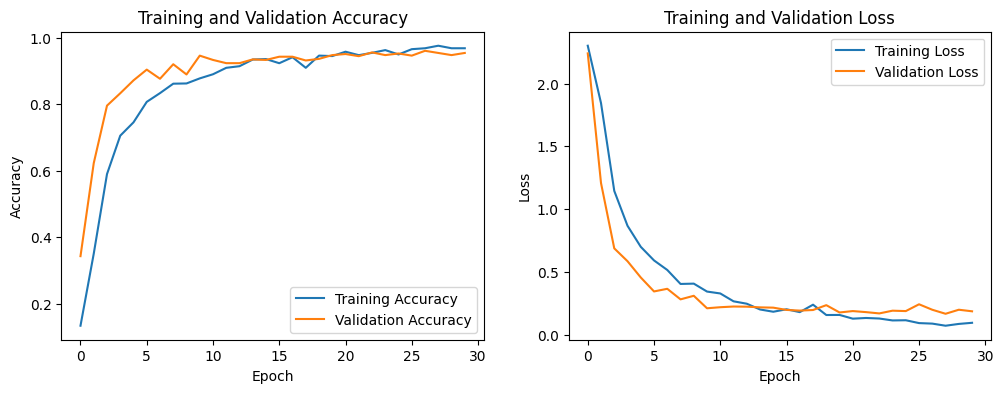

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Save the model
model.save("models/sign_language_model.h5")

<a id="overview"></a>
# <p style="background-color: #8dd97d; font-family:rockwell; color:black; font-size:150%; text-align:center; border: 5px solid  #74AAb5; border-radius: 40px 100px;">Visualizing the Results on Test Images</p>

In [10]:
# Initiailizing Empty Lists
all_images = []
all_labels = []
all_predictions = []

# Iteration over entire dataset.
for images, labels in test_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())
    # Predict for the current batch
    predictions = model.predict(images, verbose=0)
    predicted_labels = np.argmax(predictions, axis=1)
    all_predictions.append(predicted_labels)

# Joining all batches
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)
all_predictions = np.concatenate(all_predictions, axis=0)

# Showing Stats
print(f"Total images processed: {len(all_labels)}")
print(f"First 10 true labels: {all_labels[:10]}")
print(f"First 10 predicted labels: {all_predictions[:10]}")

Total images processed: 618
First 10 true labels: [5 8 9 9 5 0 9 6 9 4]
First 10 predicted labels: [5 8 9 9 5 0 9 6 9 4]


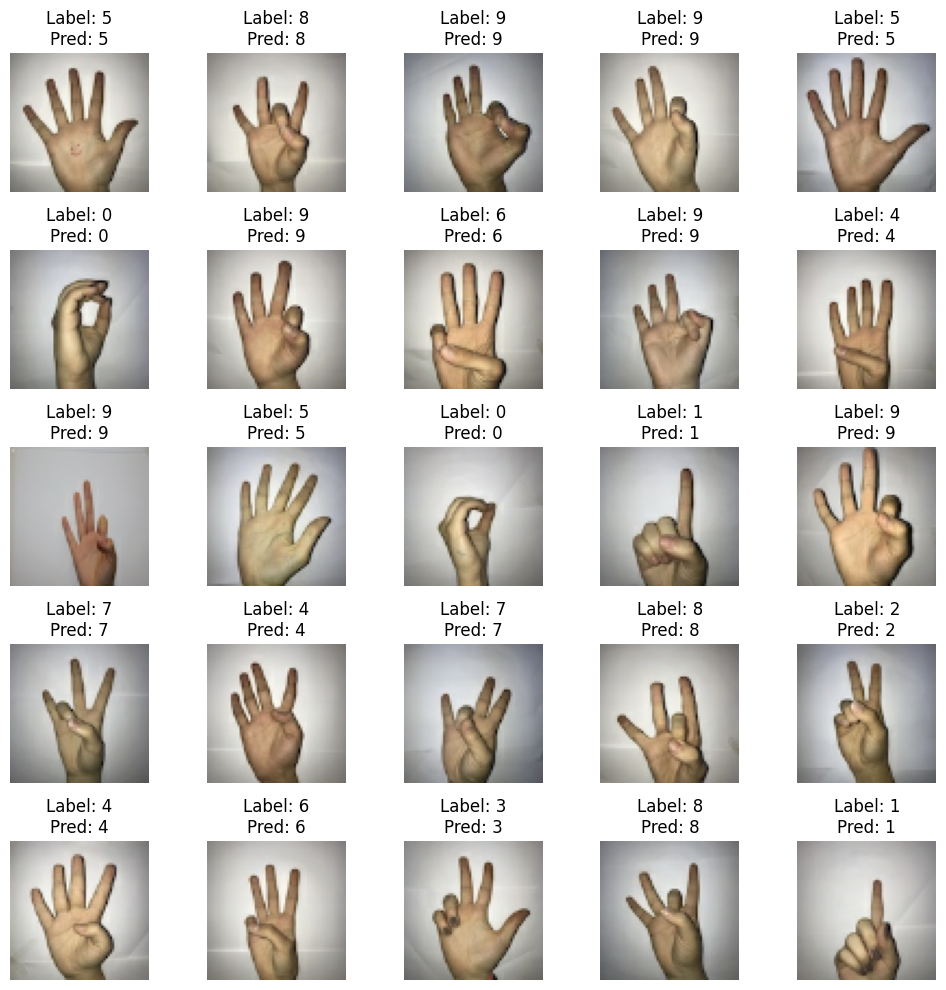

In [11]:
# Visualize 25 images out of 32
num_images_to_show = 25
plt.figure(figsize=(10, 10))
for i in range(min(num_images_to_show, len(all_labels))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(all_images[i])
    plt.title(f"Label: {all_labels[i]}\nPred: {all_predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

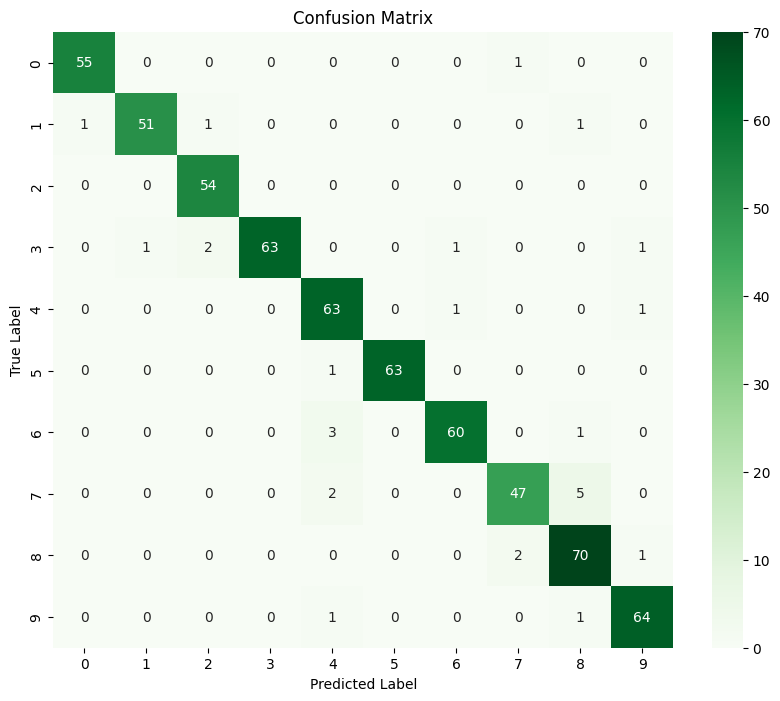

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
report = classification_report(all_labels, all_predictions, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.98      0.94      0.96        54
           2       0.95      1.00      0.97        54
           3       1.00      0.93      0.96        68
           4       0.90      0.97      0.93        65
           5       1.00      0.98      0.99        64
           6       0.97      0.94      0.95        64
           7       0.94      0.87      0.90        54
           8       0.90      0.96      0.93        73
           9       0.96      0.97      0.96        66

    accuracy                           0.95       618
   macro avg       0.96      0.95      0.96       618
weighted avg       0.96      0.95      0.95       618



<a id="overview"></a>
# <p style="background-color: #8dd97d; font-family:rockwell; color:black; font-size:100%; text-align:center; border: 5px solid  #74AAb5; border-radius: 40px 100px;">"The best way to predict the future is to invent it." - Alan Kay</p>